In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import sys
import glob
import numpy as np
import xarray as xr
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sys.path.append('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/')
sys.path.append('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/utils_gfat')

# sys.path.append('/Mi unidad/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench')
# sys.path.append('/Mi unidad/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/utils_gfat')

from utils_gfat import quicklook_lidar, lidar, plot, solar, utils
from lidar_preprocessing import *


Mounted at /content/drive


In [ ]:
def plot_as_me(ds, channel, axes, qt, wl, signal_mode, attrs, save_fig=False, **kwargs):
  cmap = mpl.cm.jet
  bounds = np.linspace(0, 100, 64)
  norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

  plot.title1('{instr} {mode} {qt} at {wl} {wlu}'.format(instr=attrs['system'],
                                                            mode=signal_mode,
                                                            qt=qt,
                                                            wl=wl,
                                                            wlu='nm'), coef=2)
  plot.title2(str(ds.time.values[0].astype('datetime64[D]')), coef=2)

  plot.title3('{} ({:.1f}N, {:.1f}E)'.format(attrs['site_location'], 
                                           float(attrs['geospatial_lat_min']), 
                                           float(attrs['geospatial_lon_min'])), coef=2)
  
  q = ds[channel][:, ds.range<10000].plot.pcolormesh(x='time', 
                 y='range', 
                 cmap='jet', 
                 vmin=kwargs['vmin'], 
                 vmax=kwargs['vmax'],
                 # norm=norm
                 )
  myFmt = mdates.DateFormatter('%H')
  axes.xaxis.set_major_formatter(myFmt)

  plot.gapsizer(axes, ds.time.values, ds.range, gapsize=5, colour='#c7c7c7')
  axes.set_xlim([ds.time[0].values.astype('datetime64[D]'), ds.time[0].values.astype('datetime64[D]')+np.timedelta64(1,'D')])
  # q.cmap.set_over('white')
  if save_fig:
    year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
    out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
    fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
    fl_name = os.path.join(out_dir, fl_name)
    plt.savefig(fl_name, dpi=200)

def normalize_ds(ds_variable, operation='standar'):
  ds_ = ds_variable.copy()
  if operation == 'standar':
    for idx, prof in enumerate(ds_variable):
      mean = prof.mean()
      std = prof.std() 
      ds_[idx] = (prof - mean) / std 
      # pdb.set_trace()
  return ds_

In [ ]:
ds = xr.load_dataset('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/1a/20210709/mhc_20210709.nc')
# ds = xr.load_dataset('/Mi unidad/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/1a/20210709/mhc_20210709.nc')

In [ ]:
dc_ds = xr.load_dataset('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/1a/20210709/mhc_1a_Pdc_20210709_0641.nc')
# ds = xr.load_dataset('/Mi unidad/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/1a/20210709/mhc_20210709.nc')

In [ ]:
dc = dc_ds['rcs_00'] / dc_ds.range**2

dc.sel(range=slice(100, 100000), time='2021-07-09T06:29:23.000000000').plot(y='range')

NameError: ignored

In [ ]:
media_bg = (ds.corrected_rcs_00.sel(range=slice(40000, 100000))/ds.range**2).mean(dim='range')
Delta_bg = np.sqrt(abs(media_bg))

media_bg.plot(x='time', label='Media BG')
Delta_bg.plot(x='time', label='RMSE BG')

plt.legend(fontsize=10)

NameError: ignored

<xarray.DataArray (time: 1395)>
array([0.01403616, 0.01071746, 0.00675169, ..., 0.00493793, 0.0046558 ,
       0.01253358])
Coordinates:
  * time     (time) datetime64[ns] 2021-07-09T00:00:42 ... 2021-07-09T23:19:26


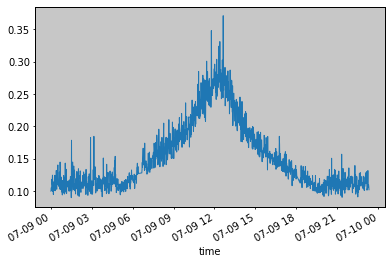

In [ ]:
std_bg = (ds.corrected_rcs_00.sel(range=slice(40000, 100000))/ds.range**2).std(dim='range')
media_bg = (ds.corrected_rcs_00.sel(range=slice(40000, 100000))/ds.range**2).mean(dim='range')

c=0.001

print(np.sqrt(abs(media_bg) ))

NSF = std_bg / np.sqrt(media_bg + c)

NSF.plot(x='time', label='NSF')



<xarray.DataArray ()>
array(-5.06491497)


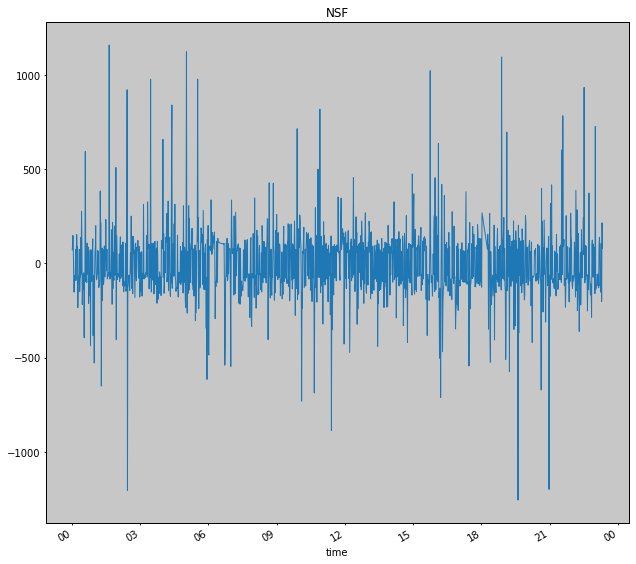

In [ ]:
media_bg = (ds.corrected_rcs_00.sel(range=slice(40000, 100000))/ds.range**2).mean(dim='range')
c = 0
Delta_bg = np.sqrt(abs(media_bg))

NSF = Delta_bg / media_bg

print(NSF.mean())

fig, axes = plt.subplots(figsize=(10,10))
NSF.plot(x='time', label='std [97 - 100 km]')
plt.title('NSF')
myFmt = mdates.DateFormatter('%H')
axes.xaxis.set_major_formatter(myFmt)
# plt.ylim(-1,1000)

In [ ]:
media_NSF = NSF.mean()

In [ ]:
media_NSF

<xarray.DataArray ()>
array(0.35631786)

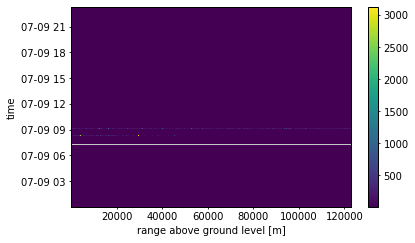

In [ ]:
media_bg = (ds.rcs_00.sel(range=slice(97000, 100000))/ds.range**2).mean(dim='range')
Delta_bg = np.sqrt(media_bg)

dc = dc_ds['rcs_00'] / dc_ds.range**2
# dc.sel(range=slice(100, 100000), time='2021-07-09T06:29:23.000000000').plot(y='range')

Delta_dc = dc.std(dim='time')
media_dc = dc.mean(dim='time')


NSF = np.sqrt(Delta_bg**2 - Delta_dc**2) / np.sqrt(media_bg - media_dc)



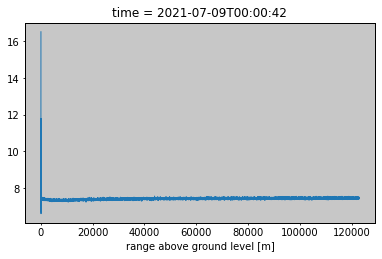

In [ ]:
NSF.sel(time='2021-07-09T00:00:42.000000000').plot(x='range')

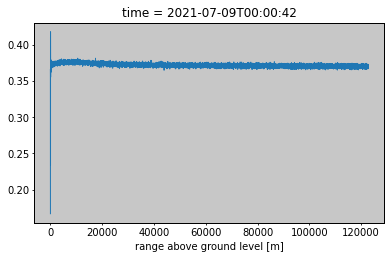

In [ ]:
deno = np.sqrt(media_bg - media_dc)
deno.sel(time='2021-07-09T00:00:42.000000000').plot(x='range')

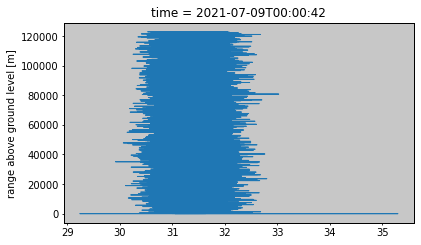

In [ ]:
(Delta_bg / Delta_dc).sel(time='2021-07-09T00:00:42.000000000').plot(y='range')

In [ ]:
signal = ds.rcs_00 / ds.range**2

In [ ]:
deltV = np.sqrt(np.power(media_NSF,2) * ds.corrected_rcs_00.sel(time=slice('2021-07-09T00:00:00.000000000', '2021-07-09T00:02:00.000000000'), range=slice(0, 14000)).mean(dim='time') + np.power(Delta_bg,2))


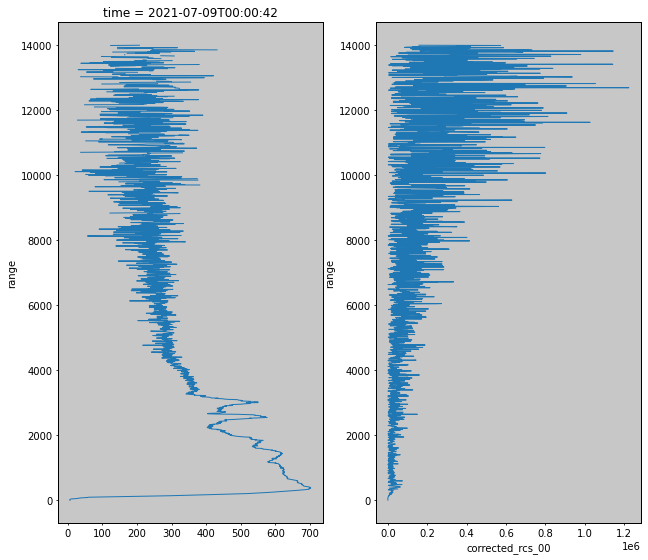

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
ax1 = plt.subplot(1,2,1)

deltV.sel(time='2021-07-09T00:00:42.000000000', range=slice(0, 14000)).plot(y='range', label='DeltaV')

ax2 = plt.subplot(1,2,2)
ds.corrected_rcs_00.sel(time=slice('2021-07-09T00:00:00.000000000', '2021-07-09T00:02:00.000000000'), range=slice(0, 14000)).std(dim='time').plot(y='range')

In [ ]:
rcs = ['corrected_rcs_00', 'corrected_rcs_02']
signal = ['corrected_signal_00', 'corrected_signal_01', 'corrected_signal_02']
alt_min = 40000

<class 'numpy.ndarray'>


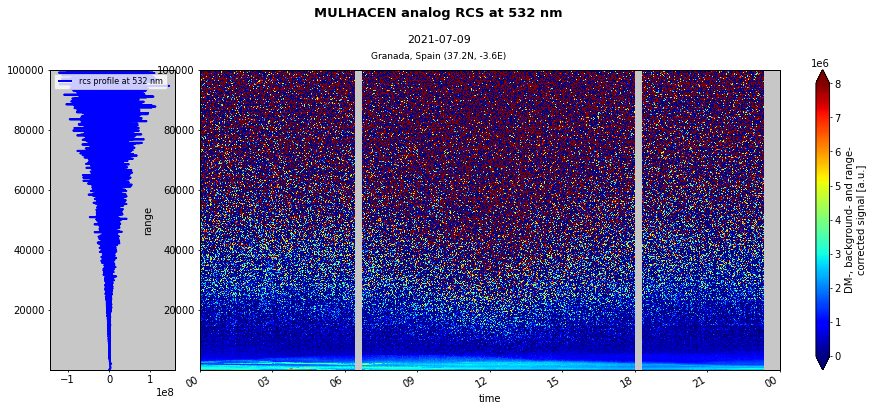

In [ ]:
qt = 'RCS'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'
fig, axes = plt.subplots(nrows=1, figsize=(15,6))



ax1 = plt.subplot(1,6,(1))

ax1.plot(ds[rcs[0]].sel(time='2021-07-09T06:48:16.000000000')[0].values, ds.range.values, lw=2, c='b', label='rcs profile at 532 nm')
ax1.legend(fontsize=8)

ax2 = plt.subplot(1,6,(2,6), sharey=ax1)

plot_as_me(ds.corrected_rcs_00,
           channel=channel,
           axes=ax2,
           qt=qt,
           wl=wl,
           signal_mode=signal_mode,
           attrs=ds.attrs,
           vmin=0,
           vmax=8e6)


<class 'numpy.ndarray'>


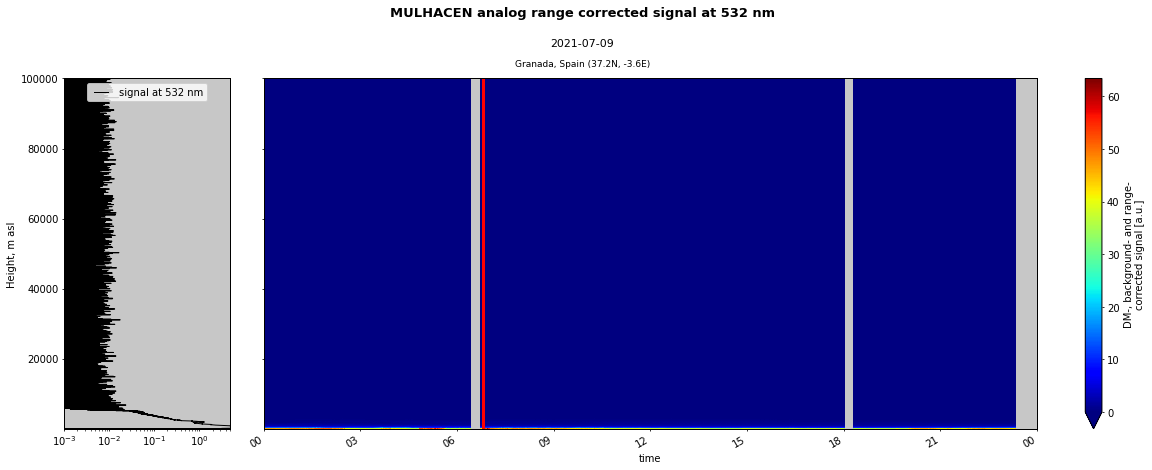

In [ ]:
qt = 'range corrected signal'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'
time_win = 10

# for time in ['2021-07-09T06:48:16.000000000', '2021-07-09T03:47:14.000000000', '2021-07-09T16:38:16.000000000']:
for time in ['2021-07-09T06:48:16.000000000']:
  fig, ax = plt.subplots(figsize=[20,7])


  ax1 = plt.subplot(1,6,(1))

  ax1.plot(ds[signal[0]].sel(time=time, method='nearest')[0].values, ds.range.values, lw=1, c='black', label='signal at 532 nm')
  # ax1.plot(ds[rcs[0]].rolling(dim={'range':3, 'time':time_win}, min_periods=3).std().sel(time=time, method='nearest')[0].values, 
  #          ds.range.values, lw=2, c='r', label='std of rcs at 532 nm')
  ax1.legend(fontsize=10, loc='upper center')


  ax2 = plt.subplot(1,6,(2,6), sharey=ax1)
  plot_as_me(ds[signal[0]], 
           channel, 
           ax2, 
           qt, 
           wl, 
           signal_mode, 
           attrs=ds.attrs, 
           vmax=None,
           vmin=0)


  
  # Create rectangle x coordinates
  startTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000')
  endTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000') + dt.timedelta(minutes=1)
  start = mpl.dates.date2num(startTime)
  end = mpl.dates.date2num(endTime)
  width = end - start
  rect = mpl.patches.Rectangle((start, 0), width, 100000, linewidth=2,color='red',fill=False)
  ax2.add_patch(rect)
  ax2.set_ylabel('')
  ax1.set_ylabel('Height, m asl')
  ax1.ticklabel_format(axis='x', style='sci')
  # ax1.set_xlabel('STD', fontsize=14)
  # ax1.set_title('STD[{time}mean]'.format(time=time_win), fontsize=14)
  o_ = plt.setp(ax2.get_yticklabels(), visible=False)
  ax1.set_xlim(0.001, 5)
  ax1.set_xscale('log')

  # year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-')
  # hour = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').hour
  # minute = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').minute
  # out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  # fl_name = '{instru}_{qt}_with_STD[{time}mean]_profile at_{hour}{minute}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, hour=hour, time=time_win, minute=minute, wl=wl, mode=signal_mode, y=year, m=month, d=day)
  # fl_name = os.path.join(out_dir, fl_name)
  # plt.savefig(fl_name, dpi=200)

$$
\mathrm{NSF}=\frac{\Delta V_{b}}{\sqrt{V_{b}}}
$$

ó

$$
\mathrm{NSF}=\frac{\left[\left(\Delta V_{b}\right)^{2}-\left(\Delta V_{d}\right)^{2}\right]^{1 / 2}}{\left(V_{b}-\bar{V}_{d}\right)^{1 / 2}}
$$


(-0.1, 0.1)

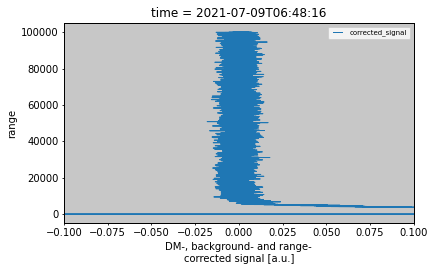

In [ ]:
altura = 100000
ds[signal[0]].sel(time='2021-07-09T06:48:16.000000000', range=slice(0, altura), method=None).plot(y='range', label='corrected_signal')
# ds.signal_00.sel(time='2021-07-09T06:48:16.000000000', range=slice(0, altura), method=None).plot(y='range', label='signal')

plt.legend()
# plt.xscale('log')
plt.xlim(-0.1, 0.1)

In [ ]:
media_std = ds[signal[0]].rolling(dim={'range':3, 'time':1}, min_periods=3).std()
media_std = media_std.sel(range=slice(40000, 50000)).mean(dim='range')
nmstd = ds[signal[0]].rolling(dim={'range':3, 'time':1}, min_periods=3).std()
nmstd = nmstd / media_std

# nmstd.plot()
# plt.ylabel('STD of corrected signal')

(-10.0, 10.0)

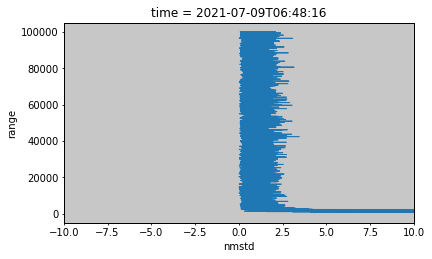

In [ ]:
nmstd.sel(time='2021-07-09T06:48:16.000000000').plot(y='range')
# plt.xscale('log')
plt.xlabel('nmstd')
plt.xlim(-10, 10)

In [ ]:
nmstd.sel(time='2021-07-09T06:48:16.000000000').plot(y=)

Text(0, 0.5, 'std of the signal')

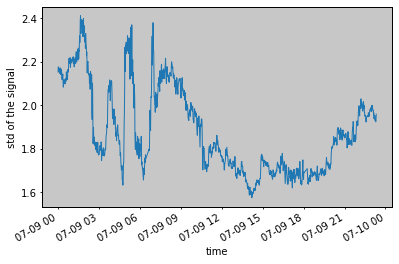

In [ ]:
ds[signal[0]].std(dim='range').plot(x='time')
plt.ylabel('std of the signal')



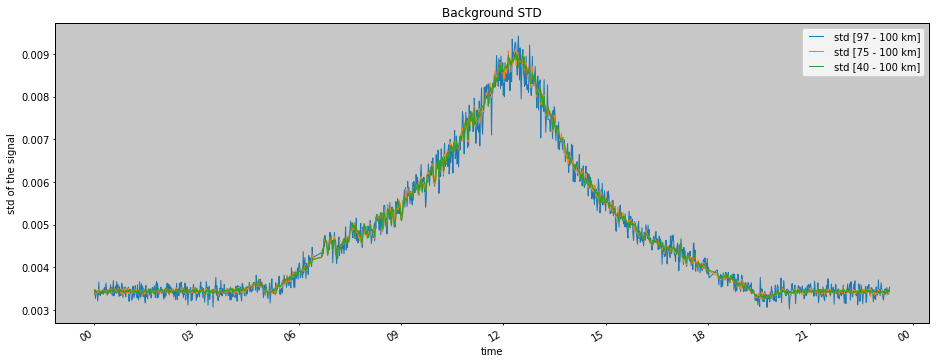

In [ ]:
fig, axes = plt.subplots(nrows=1, figsize=(15,6))

ds[signal[0]].sel(range=slice(97000, 100000)).std(dim='range').plot(x='time', label='std [97 - 100 km]')
ds[signal[0]].sel(range=slice(75000, 100000)).std(dim='range').plot(x='time', label='std [75 - 100 km]')
ds[signal[0]].sel(range=slice(40000, 100000)).std(dim='range').plot(x='time', label='std [40 - 100 km]')
plt.title('Background STD')

plt.legend(fontsize=10)
plt.ylabel('std of the signal')

myFmt = mdates.DateFormatter('%H')
axes.xaxis.set_major_formatter(myFmt)

# NSF [eq. 15] 

## PC

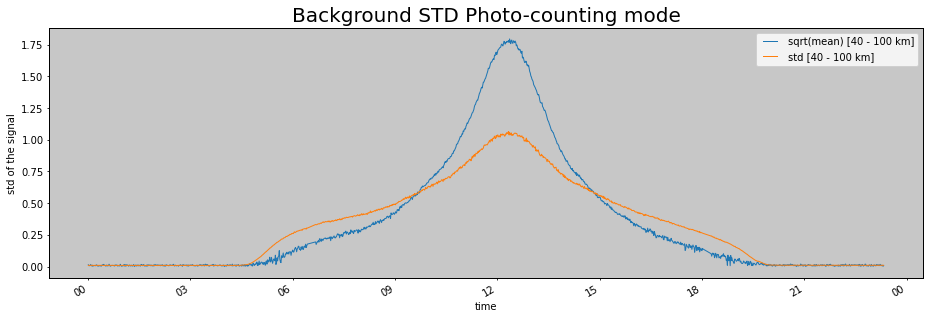

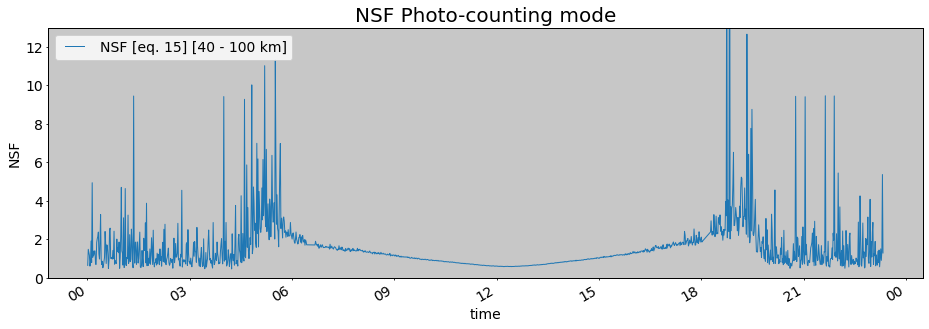

In [ ]:
# c = 0.005
c = 0
for alt_min in [40000]:
  fig, axes = plt.subplots(nrows=2, figsize=(15,5))
  ax1 = plt.subplot(1, 1, (1,1))
  sqrt_mean_bg = np.sqrt(abs(ds[signal[1]].sel(range=slice(alt_min, 100000)).mean(dim='range')) + c)
  std_bg = ds[signal[1]].sel(range=slice(alt_min, 100000)).std(dim='range')
  sqrt_mean_bg.plot(x='time', label='sqrt(mean) [{alt_min} - 100 km]'.format(alt_min=int(alt_min/1000)),
                    axes=ax1)
  std_bg.plot(x='time', label='std [{alt_min} - 100 km]'.format(alt_min=int(alt_min/1000)),
              axes=ax1)
  

  # ax2 = plt.subplot(2, 1, (1,1), sharey=ax1)

  # NSF_15 = (std_bg/sqrt_mean_bg)
  # NSF_15.plot(x='time', label='NSF [eq. 15] [40 - 100 km]', axes=ax2)

  plt.title('Background STD Photo-counting mode', fontsize=20)

  plt.legend(fontsize=10)
  plt.ylabel('std of the signal')

  myFmt = mdates.DateFormatter('%H')
  ax1.xaxis.set_major_formatter(myFmt)

  fig.show()

  fig, axes = plt.subplots(nrows=2, figsize=(15,5))
  ax1 = plt.subplot(1, 1, (1,1))
  NSF_15 = (std_bg/sqrt_mean_bg)
  NSF_15.plot(x='time', label='NSF [eq. 15] [{alt_min} - 100 km]'.format(alt_min=int(alt_min/1000)),
              axes=ax1)

  plt.title('NSF Photo-counting mode', fontsize=20)

  plt.legend(fontsize=14)
  plt.ylabel('NSF', fontsize=14)
  plt.xlabel('time', fontsize=14)

  plt.ylim(0,13)

  plt.tick_params(axis='both', which='major', labelsize=14)
  plt.tick_params(axis='both', which='minor', labelsize=14)

  myFmt = mdates.DateFormatter('%H')
  ax1.xaxis.set_major_formatter(myFmt)


fotoconteo en MHz

## Uncertainty

$\Delta V \approx\left[\mathrm{NSF}^{2} V_{s}+\left(\Delta V_{b}\right)^{2}\right]^{1 / 2}$

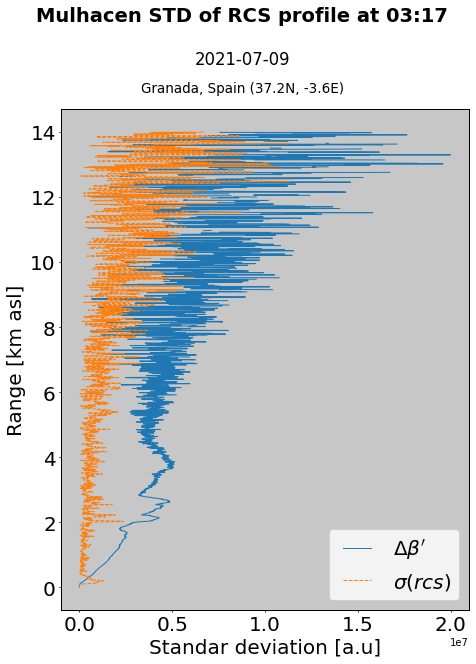

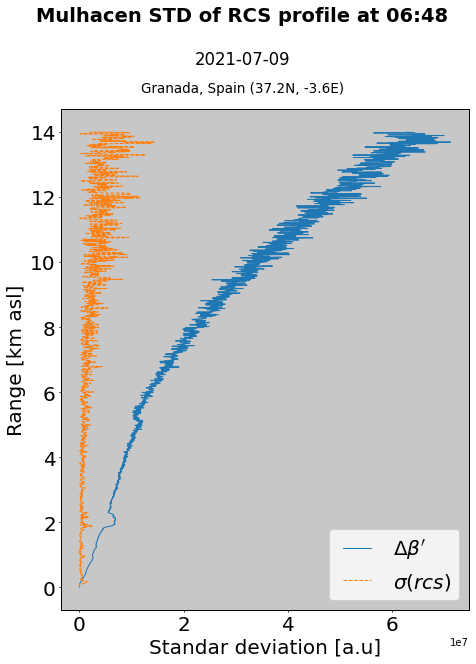

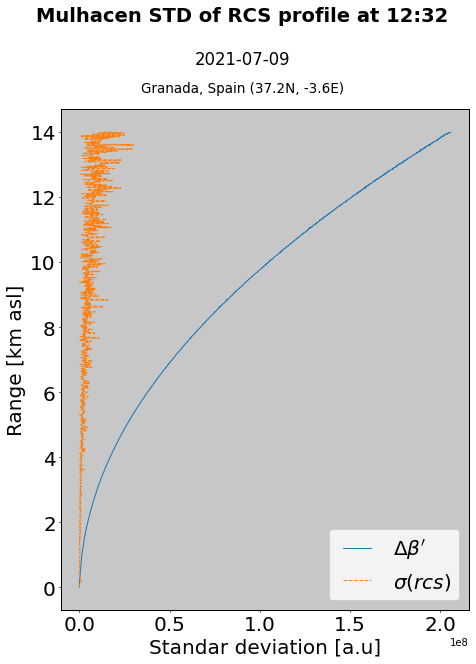

In [ ]:
times = ['2021-07-09T03:17:41.000000000','2021-07-09T06:48:16.000000000', '2021-07-09T12:32:26.000000000']
ds_ = ds.assign_coords(range=ds.range/1000)
# pdb.set_trace()
N_b = len(ds[signal[0]].sel(range=slice(alt_min, 100000)).range)

media_deltV = np.sqrt(np.power(NSF_15,2) * ds[signal[0]] + np.power(std_bg,2) + np.power(std_bg /np.sqrt(N_b) ,2)).sel(range=slice(alt_min, 100)).mean(dim='range')
media_deltV = 0
deltV = (np.sqrt(np.power(NSF_15,2) * ds[signal[0]] + np.power(std_bg,2) + np.power(std_bg /np.sqrt(N_b) ,2)) - media_deltV) * ds.range**2 
deltV_ = deltV.assign_coords(range=deltV.range/1000)

# pdb.set_trace()

for time in times:
  fig, axes = plt.subplots(nrows=1, figsize=(7,10))
  
  
  deltV_.sel(time=time, range=slice(0,14)).plot(y='range', label=r"$\Delta \beta '$")
  ((ds_[signal[0]] * (ds_.range*1000)**2).rolling(dim={'range':3, 'time':1}, min_periods=3).std().sel(time=time, range=slice(0,14)) * 10).plot(y='range', label=r"$\sigma (rcs)$", linestyle='dashed')

  plt.xlabel('Standar deviation [a.u]', fontsize=20)
  plt.ylabel('Range [km asl]', fontsize=20)


  plt.tick_params(axis='both', which='major', labelsize=20)
  plt.tick_params(axis='both', which='minor', labelsize=20)

  plt.legend(fontsize=20)
  # plt.xlim(-10, 10)
  # plt.xscale('log')
  plt.title('')
  plot.title1('Mulhacen STD of RCS profile at {time}'.format(time=time[11:16]), coef=3)
  plot.title2(str(ds.time.values[0].astype('datetime64[D]')), coef=3)
  plot.title3('{} ({:.1f}N, {:.1f}E)'.format(ds.attrs['site_location'], 
                                           float(ds.attrs['geospatial_lat_min']), 
                                           float(ds.attrs['geospatial_lon_min'])), coef=3)

## NSF 
$\Delta \beta^{\prime}=\frac{r^{2}}{C}\left[\left(\mathrm{NSF}_{V}\right)^{2} V_{s}+\left(\Delta V_{b}\right)^{2}+\left(\Delta \overline{V_{b}}\right)^{2}\right]^{1 / 2}$



In [ ]:
# pdb.set_trace()
N_b = len(ds[signal[0]].sel(range=slice(alt_min, 100000)).range)

# media_deltV = np.sqrt(np.power(NSF_15,2) * ds[signal[0]] + np.power(std_bg,2) + np.power(std_bg /np.sqrt(N_b) ,2)).sel(range=slice(alt_min, 100000)).mean(dim='range')
media_deltV = 0
deltV = (np.sqrt(np.power(NSF_15,2) * ds[signal[0]] + np.power(std_bg,2) + np.power(std_bg /np.sqrt(N_b) ,2)) - media_deltV) * ds.range**2

for time in times:
  fig, axes = plt.subplots(nrows=1, figsize=(10,10))

  deltV.sel(time=time, range=slice(0,14000)).plot(y='range', label=r"Delta $\Delta \beta '$")
  (ds[signal[0]].sel(time=time, range=slice(0,14000))*ds.range**2).plot(y='range', label='Signal profile')

  plt.legend(fontsize=10)
  # plt.xlim(-1, 10)
  # plt.xscale('log')
  plt.title('Incertidumbre normalizada PC mode at {time}'.format(time=time[11:16]))

KeyError: ignored

## PMT

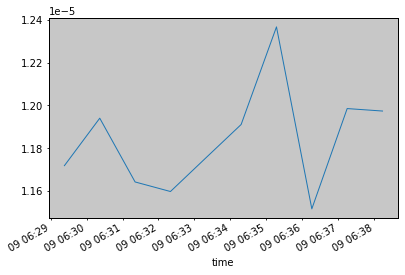

In [ ]:
dc_std = np.power((dc_ds.rcs_00/(dc_ds.range ** 2)).sel(range=slice(40000, 100000)).std(dim='range'), 2) 
dc_mean = (dc_ds.rcs_00/(dc_ds.range ** 2)).sel(range=slice(40000, 100000)).mean(dim='range')
c2 = dc_std - dc_mean

dc_std.plot()

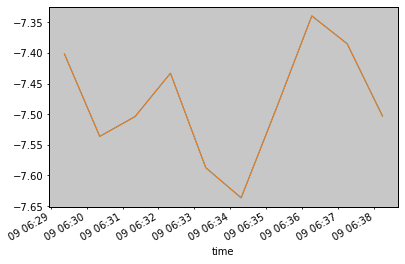

In [ ]:
dc_std = np.power((dc_ds.rcs_00/(dc_ds.range ** 2)).sel(range=slice(40000, 100000)).std(dim='range'), 2)

dc_mean = (dc_ds.rcs_00/(dc_ds.range ** 2)).sel(range=slice(40000, 100000)).mean(dim='range')

c1 = dc_std/(0.5**2) - dc_mean

c1

c1.plot()
c2.plot()

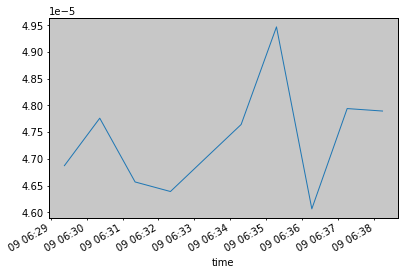

In [ ]:
(dc_std/(0.5**2)).plot()

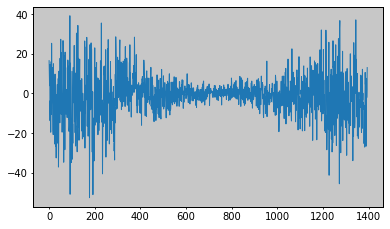

In [ ]:
signal = (ds.corrected_rcs_00/(ds.range ** 2)).sel(range=slice(40000, 100000)).values
variance = np.var(signal, axis=1)
std1 = np.std(signal, axis=1)
std2 = np.sqrt(variance)
mean = np.mean(signal, axis=1)
NSF2 = mean/variance
plt.plot(NSF2)

In [ ]:
SNR = mean/std1
plt.plot(SNR)

In [ ]:
mean_NSF2 = np.mean(NSF2[SNR > 0.35])
std_NSF2 = np.std(NSF2[SNR > 0.35])
mean_NSF2, std_NSF2

(nan, nan)

In [ ]:
mean_NSF2 = np.mean(NSF2[SNR > 0.40])
std_NSF2 = np.std(NSF2[SNR > 0.40])
mean_NSF2, std_NSF2

(nan, nan)

Text(0.5, 0, 'Lidar signal')

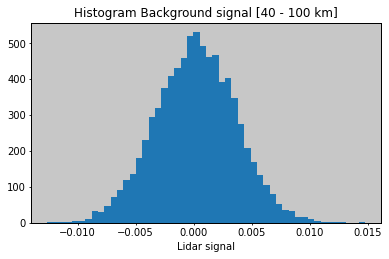

In [ ]:
plt.hist(signal[0,:], bins=50)
plt.title('Histogram Background signal [40 - 100 km]')
plt.xlabel('Lidar signal')
plt.xlabel('Lidar signal')

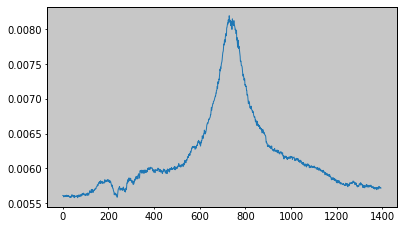

In [ ]:
signal = (ds.corrected_rcs_01/(dc_ds.range ** 2)).sel(range=slice(0, 20000)).values
variance = np.var(signal, axis=1)
std1 = np.std(signal, axis=1)
std2 = np.sqrt(variance)
mean = np.mean(signal, axis=1)
NSF2 = mean/variance
plt.plot(NSF2)



In [ ]:
plt.hist(signal[0,:], bins=500)

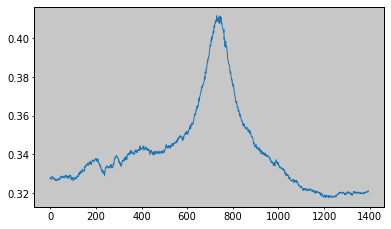

In [ ]:
SNR = mean/std1
plt.plot(SNR)

In [ ]:
mean_NSF2 = np.mean(NSF2[SNR > 0.35])
std_NSF2 = np.std(NSF2[SNR > 0.35])
mean_NSF2, std_NSF2

(0.007143915072331791, 0.0005738005583523612)

In [ ]:
mean_NSF2 = np.mean(NSF2[SNR > 0.40])
std_NSF2 = np.std(NSF2[SNR > 0.40])
mean_NSF2, std_NSF2

(0.008039111810239042, 9.142174432098849e-05)

## Se tienen 10 perfiles
- Se calcula el promedio
- Se calcula la STD
- Se calcula la $\Delta V_b$ de cada perfil
- Se promedian los $\Delta V_b$
- A la STD se le resta el promedio de los $\Delta V_b$

Para encontrar un perfil sin incertidumbre electrónica, solo de la señal. Debe ser un perfil recto.

In [ ]:
times = ['2021-07-09T03:17:41.000000000','2021-07-09T06:48:16.000000000', '2021-07-09T12:32:26.000000000']

array(0.00161555)

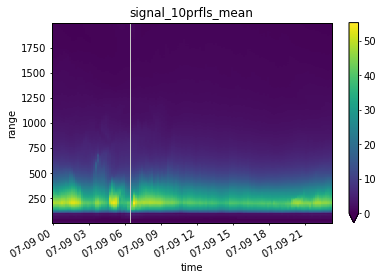

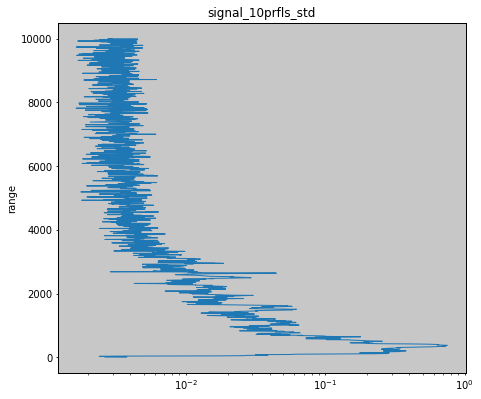

In [ ]:
signal_bg = (ds.corrected_rcs_00/(ds.range ** 2)).sel(range=slice(40000, 100000)).values
signal_10prfls_mean = (ds.corrected_rcs_00/(ds.range ** 2)).resample(time='10T').mean()
signal_10prfls_std = (ds.corrected_rcs_00/(ds.range ** 2)).resample(time='10T').std()
deltaVb = signal_10prfls_mean.sel(range=slice(40000,100000)).std(dim='range')
deltaVb_mean = deltaVb.mean().values

signal_10prfls_std_nobgmean = signal_10prfls_std - deltaVb_mean

signal_10prfls_mean.sel(range=slice(0,2000)).plot.pcolormesh(x='time', vmin=0)
plt.title('signal_10prfls_mean')

fig = plt.figure(figsize=(7,7))
signal_10prfls_std[0].sel(range=slice(0,10000)).plot(y='range')
plt.title('signal_10prfls_std')
plt.xscale('log')


fig = plt.figure()
plt.plot(deltaVb)
plt.title('deltaVb')

# fig = plt.figure()
# plt.plot(signal_10prfls_std_nobgmean)
# plt.title('signal_10prfls_std_nobgmean')

deltaVb_mean

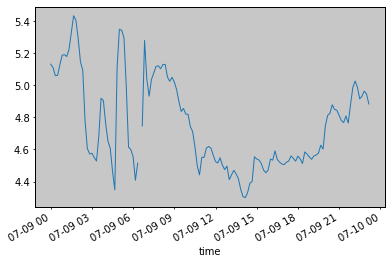

In [ ]:
signal_10prfls_variance = signal_10prfls_std**2
signal_10prflsmean_mean = signal_10prfls_mean.mean(dim='range')

NSF2 = signal_10prfls_variance / signal_10prflsmean_mean

np.sqrt(NSF2).plot()

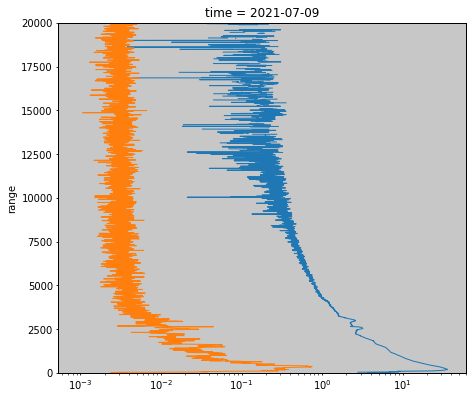

In [ ]:
fig = plt.figure(figsize=(7,7))

N_b = len(signal_10prfls_std.sel(range=slice(40000, 100000)).range)
np.sqrt(signal_10prfls_mean * NSF2 + signal_10prfls_std**2 + np.power((signal_10prfls_std/N_b), 2))[0].plot(y='range')
signal_10prfls_std[0].plot(y='range')
plt.ylim(0,20000)
plt.xscale('log')

array(0.00161555)

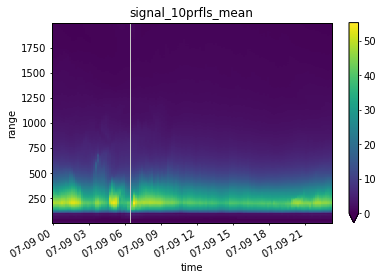

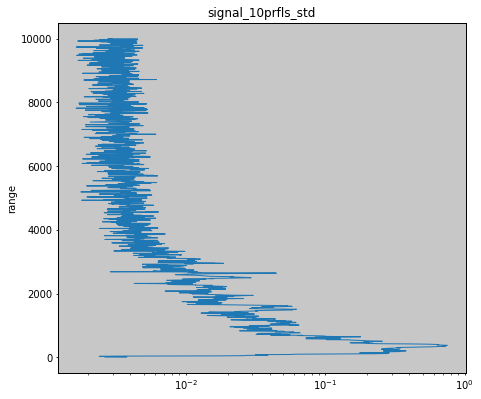

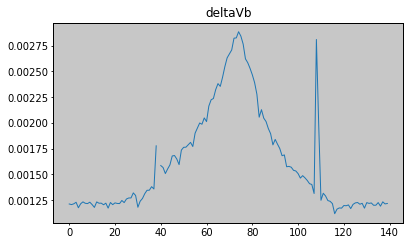

In [ ]:
# signal_bg = (ds.corrected_rcs_00/(ds.range ** 2)).sel(range=slice(40000, 100000)).values
rcs_10prfls_mean = (ds.corrected_rcs_00).resample(time='10T').mean()
rcs_10prfls_std = (ds.corrected_rcs_00).resample(time='10T').std()
deltaB = signal_10prfls_mean.sel(range=slice(40000,100000)).std(dim='range')
deltaB_mean = deltaVb.mean().values

rcs_10prfls_std_nobgmean = signal_10prfls_std - deltaVb_mean

signal_10prfls_mean.sel(range=slice(0,2000)).plot.pcolormesh(x='time', vmin=0)
plt.title('signal_10prfls_mean')

fig = plt.figure(figsize=(7,7))
rcs_10prfls_std[0].sel(range=slice(0,10000)).plot(y='range')
plt.title('signal_10prfls_std')
plt.xscale('log')


fig = plt.figure()
plt.plot(deltaVb)
plt.title('deltaVb')

# fig = plt.figure()
# plt.plot(signal_10prfls_std_nobgmean)
# plt.title('signal_10prfls_std_nobgmean')

deltaVb_mean

(-1000000.0, 1000000.0)

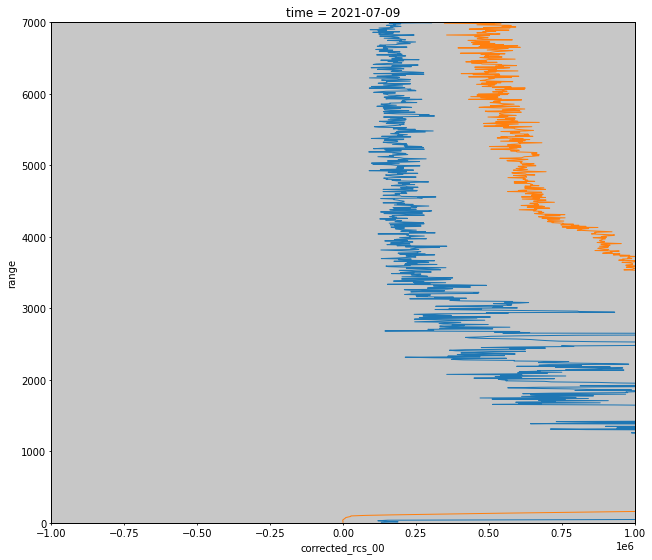

In [ ]:
fig = plt.figure(figsize=(10,10))

N_b = len(rcs_10prfls_std.sel(range=slice(40000, 100000)).range)

deltaB = np.sqrt(rcs_10prfls_mean * NSF2 + rcs_10prfls_std**2 + np.power((rcs_10prfls_std/N_b), 2))[0]
# np.sqrt(rcs_10prfls_mean * NSF2 + rcs_10prfls_std**2 + np.power((rcs_10prfls_std/N_b), 2))[0].plot(y='range')
(5e7*signal_10prfls_std[0]).plot(y='range', ls='solid')
rcs_10prfls_mean[0].plot(y='range', ls='solid')
plt.ylim(0,7000)
plt.xlim(-0.1e7, 0.1e7)
# plt.xscale('log')

# Pintar un día limpio sobre lo anterior, para ver la tendencia del perfil en ausencia de aerosol. El gran problema es encontrar una función para ajustar el comportamiento del perfil.

- Implementar ecuación (21) utilizando un unico perfil (sin promedio de 10). Compara con la std de la rcs, para imitar la figura 2.
- 

In [ ]:
ds_pristino = lidar.preprocessing(rs_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Prs*.nc', 
                             dc_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Pdc*.nc', 
                             channels='all')

In [ ]:
ds_pristino

<class 'numpy.ndarray'>


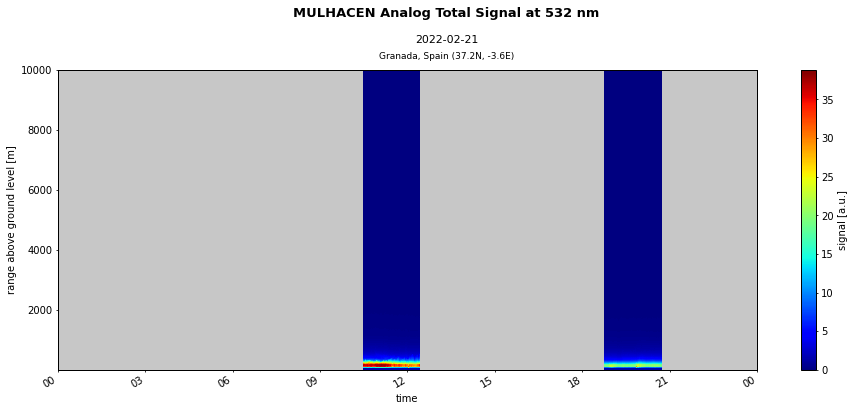

In [ ]:
fig, axes = plt.subplots(nrows=1, figsize=(15,6))
plot_as_me(ds_pristino,'signal_532xta', axes, 'Total Signal', '532', 'Analog', ds_pristino.attrs, vmin=0, vmax=None)

<xarray.DataArray 'time' ()>
array('2022-02-21T19:11:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-02-21T19:11:44
Attributes:
    standard_name:  time

In [ ]:
signal_bg = ds_pristino.signal_532xta.sel(range=slice(0, 100000))
signal_mean = ds_pristino.signal_532xta.sel(time='2022-02-21T19:11:44.000000000').mean(dim='range')
signal_var = ds.signal_532xta.sel(time='2022-02-21T19:11:44.000000000').std(dim='range')
deltaVb = signal_bg.std(dim='range')
deltaVb_mean = deltaVb.mean().values
signal_std_nobgmean = signal_std - deltaVb_mean


NSF2 = signal_var / signal_mean

signal_bg

<xarray.DataArray 'signal_532xta' (time: 242, range: 2666)>
dask.array<absolute, shape=(242, 2666), dtype=float64, chunksize=(122, 2666), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2022-02-21T10:29:09 ... 2022-02-21T20:41:21
  * range    (range) float32 7.5 15.0 22.5 30.0 ... 1.998e+04 1.999e+04 2e+04
Attributes:
    long_name:       signal
    wavelength:      532
    detection_mode:  0
    units:           a.u.
    eta_GHK:         eta_an       0.13\neta_pc       0.21\nGR        1.58726\...

In [ ]:
N_b = len(signal_bg.range)

deltV = np.sqrt(np.power(NSF_15,2) * ds[signal[0]] + np.power(std_bg,2) + np.power(std_bg /np.sqrt(N_b) ,2) - media_deltV) * ds.range**2

# media_deltV = np.sqrt(np.power(NSF_15,2) * ds[signal[0]] + np.power(std_bg,2) + np.power(std_bg /np.sqrt(N_b) ,2)).sel(range=slice(alt_min, 100000)).mean(dim='range')
# media_deltV = 0


## -----

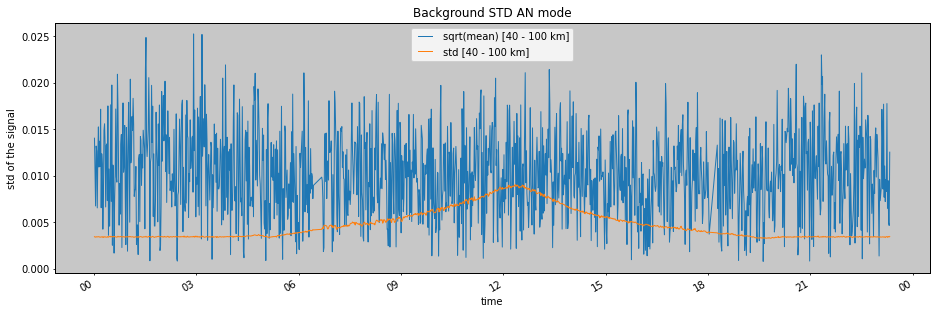

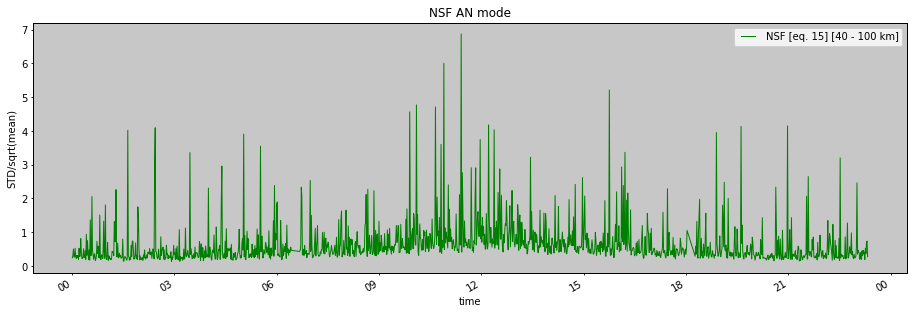

In [ ]:
c = 0
for alt_min in [40000]:
  fig, axes = plt.subplots(nrows=2, figsize=(15,5))
  ax1 = plt.subplot(1, 1, (1,1))
  sqrt_mean_bg = np.sqrt(abs(ds[signal[0]].sel(range=slice(alt_min, 100000)).mean(dim='range')) + c)
  std_bg = ds[signal[0]].sel(range=slice(alt_min, 100000)).std(dim='range')
  sqrt_mean_bg.plot(x='time', label='sqrt(mean) [{alt_min} - 100 km]'.format(alt_min=int(alt_min/1000)),
                    axes=ax1)
  std_bg.plot(x='time', label='std [{alt_min} - 100 km]'.format(alt_min=int(alt_min/1000)),
              axes=ax1)
  

  # ax2 = plt.subplot(2, 1, (1,1), sharey=ax1)


  plt.title('Background STD AN mode')

  plt.legend(fontsize=10)
  plt.ylabel('std of the signal')

  myFmt = mdates.DateFormatter('%H')
  ax1.xaxis.set_major_formatter(myFmt)

  fig.show()

  fig, axes = plt.subplots(nrows=2, figsize=(15,5))
  ax1 = plt.subplot(1, 1, (1,1))
  NSF_15 = (std_bg/sqrt_mean_bg)
  NSF_15.plot(x='time', label='NSF [eq. 15] [{alt_min} - 100 km]'.format(alt_min=int(alt_min/1000)),
              axes=ax1,
              c='g')

  plt.title('NSF AN mode')

  plt.legend(fontsize=10)
  plt.ylabel('STD/sqrt(mean)')

  myFmt = mdates.DateFormatter('%H')
  ax1.xaxis.set_major_formatter(myFmt)


In [ ]:
 NSF_15.median()


NameError: ignored

## Uncertainty

$\Delta V \approx\left[\mathrm{NSF}^{2} V_{s}+\left(\Delta V_{b}\right)^{2} + \left(\Delta V_{b}\right)^{2}\right ]^{1 / 2}$

Text(0.5, 1.0, 'Incertidumbre AN mode')

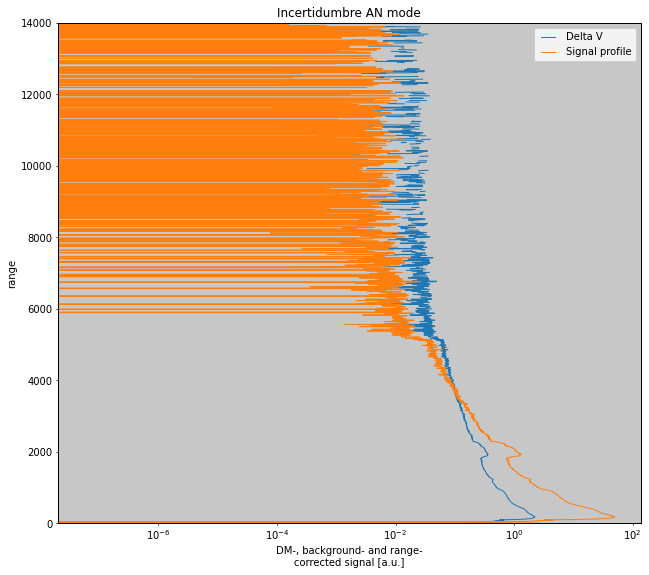

In [ ]:
# pdb.set_trace()
N_b = len(ds[signal[0]].sel(range=slice(alt_min, 100000)).range)


deltV = np.sqrt(np.power(NSF_15,2) * ds[signal[0]] + np.power(std_bg,2) + np.power(std_bg /np.sqrt(N_b) ,2))


fig, axes = plt.subplots(nrows=1, figsize=(10,10))

deltV.sel(time='2021-07-09T06:48:16.000000000').plot(y='range', label='Delta V')
ds[signal[0]].sel(time='2021-07-09T06:48:16.000000000').plot(y='range', label='Signal profile')

plt.legend(fontsize=10)
# plt.xlim(0.001, 100)
plt.ylim(0, 14000)
plt.xscale('log')
plt.title('Incertidumbre AN mode')

## NSF 
$\Delta \beta^{\prime}=\frac{r^{2}}{C}\left[\left(\mathrm{NSF}_{V}\right)^{2} V_{s}+\left(\Delta V_{b}\right)^{2}+\left(\Delta \overline{V_{b}}\right)^{2}\right]^{1 / 2}$



Text(0.5, 1.0, 'Incertidumbre AN mode')

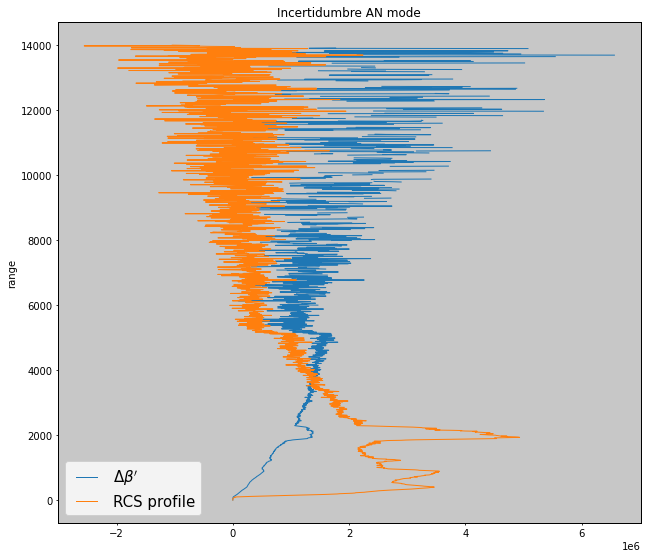

In [ ]:
# pdb.set_trace()
N_b = len(ds[signal[0]].sel(range=slice(alt_min, 100000)).range)

media_deltV = np.sqrt(np.power(NSF_15,2) * ds[signal[0]] + np.power(std_bg,2) + np.power(std_bg /np.sqrt(N_b) ,2)).sel(range=slice(alt_min, 100000)).mean(dim='range')
media_deltV = 0

deltV = np.sqrt(np.power(NSF_15,2) * ds[signal[0]] + np.power(std_bg,2) + np.power(std_bg /np.sqrt(N_b) ,2) - media_deltV) * ds.range**2


fig, axes = plt.subplots(nrows=1, figsize=(10,10))

deltV.sel(time='2021-07-09T06:48:16.000000000', range=slice(0,14000)).plot(y='range', label=r"$\Delta \beta '$")
(ds[signal[0]].sel(time='2021-07-09T06:48:16.000000000', range=slice(0,14000))*ds.range**2).plot(y='range', label='RCS profile')

plt.legend(fontsize=15)
# plt.xlim(0.001, 100)
# plt.xscale('log')
plt.title('Incertidumbre AN mode')

# NSF [eq. 16]

## AN

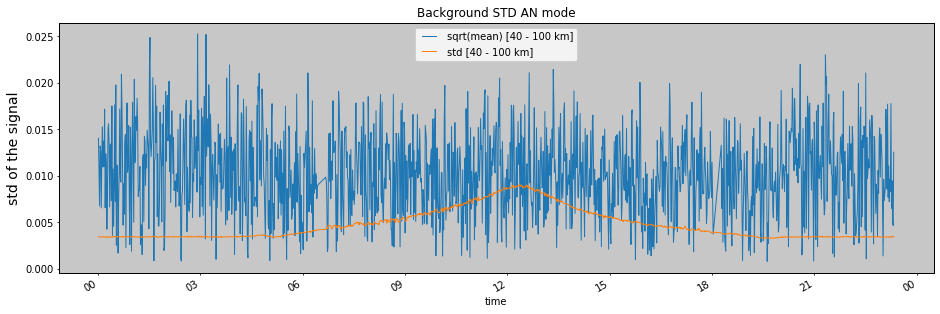

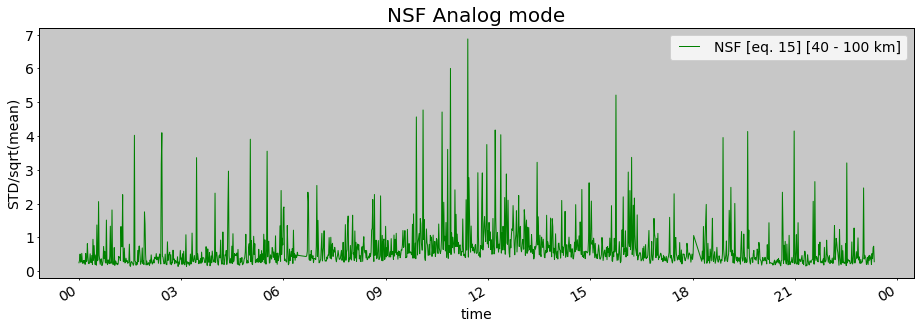

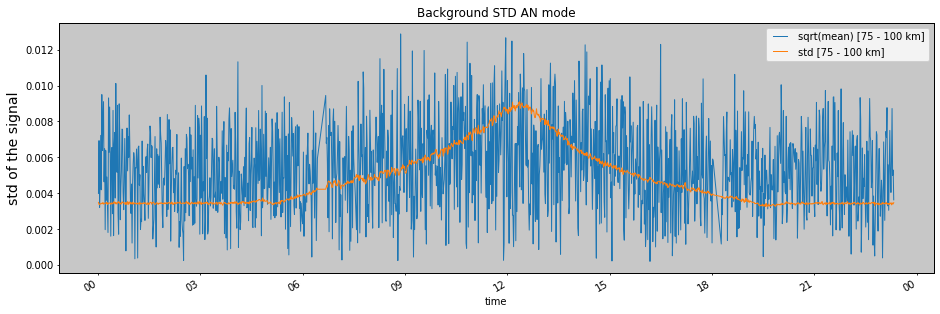

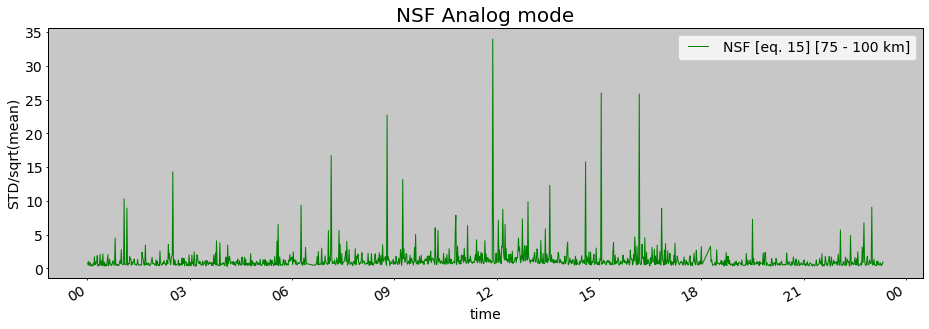

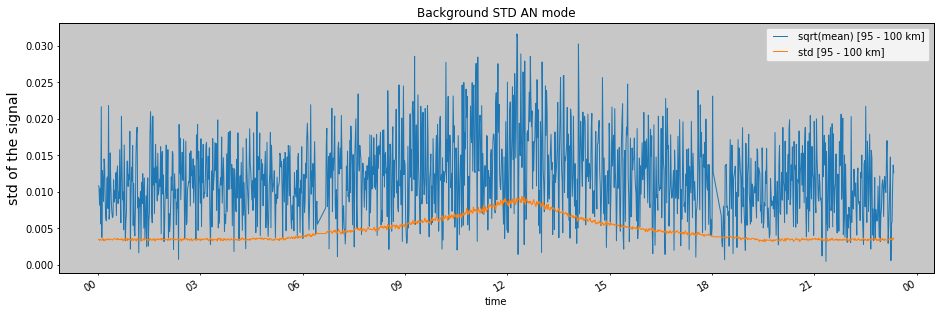

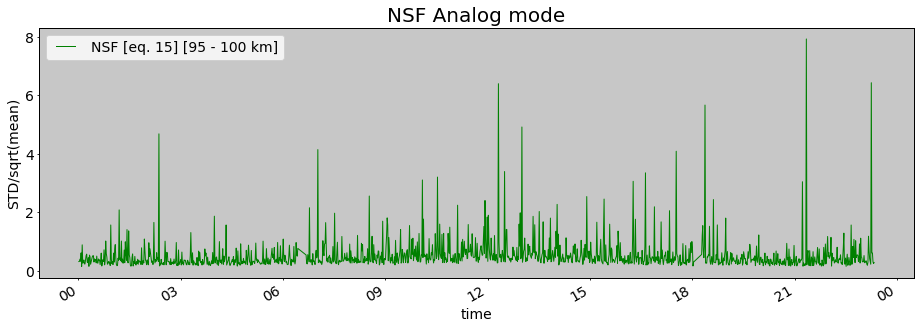

In [ ]:

for alt_min in [40000, 75000, 95000]:
  fig, axes = plt.subplots(nrows=2, figsize=(15,5))
  ax1 = plt.subplot(1, 1, (1,1))
  sqrt_mean_bg = np.sqrt(np.abs(ds[signal[0]].sel(range=slice(alt_min, 100000)).mean(dim='range')))
  std_bg = ds[signal[0]].sel(range=slice(alt_min, 100000)).std(dim='range')
  sqrt_mean_bg.plot(x='time', label='sqrt(mean) [{alt_min} - 100 km]'.format(alt_min=int(alt_min/1000)),
                    axes=ax1)
  std_bg.plot(x='time', label='std [{alt_min} - 100 km]'.format(alt_min=int(alt_min/1000)),
              axes=ax1)
  

  # ax2 = plt.subplot(2, 1, (1,1), sharey=ax1)

  # NSF_15 = (std_bg/sqrt_mean_bg)
  # NSF_15.plot(x='time', label='NSF [eq. 15] [40 - 100 km]', axes=ax2)

  plt.title('Background STD AN mode')

  plt.legend(fontsize=10)
  plt.ylabel('std of the signal', fontsize=14)

  myFmt = mdates.DateFormatter('%H')
  ax1.xaxis.set_major_formatter(myFmt)

  fig.show()

  fig, axes = plt.subplots(nrows=2, figsize=(15,5))
  ax1 = plt.subplot(1, 1, (1,1))
  NSF_15 = (std_bg/sqrt_mean_bg)
  NSF_15.plot(x='time', label='NSF [eq. 15] [{alt_min} - 100 km]'.format(alt_min=int(alt_min/1000)),
              axes=ax1,
              c='g')

  plt.title('NSF Analog mode', fontsize=20)

  plt.tick_params(axis='both', which='major', labelsize=14)
  plt.tick_params(axis='both', which='minor', labelsize=14)

  plt.legend(fontsize=14)
  plt.ylabel('STD/sqrt(mean)', fontsize=14)
  plt.xlabel('time', fontsize=14)
  
  myFmt = mdates.DateFormatter('%H')
  ax1.xaxis.set_major_formatter(myFmt)


<xarray.Dataset>
Dimensions:                (n_chan: 10, nv: 2, range: 13333, time: 1395)
Coordinates:
  * time                   (time) datetime64[ns] 2021-07-09T00:00:42 ... 2021...
  * range                  (range) float32 7.5 15.0 22.5 ... 9.999e+04 1e+05
Dimensions without coordinates: n_chan, nv
Data variables: (12/106)
    time_bnds              (time, nv) datetime64[ns] 2021-07-09T00:00:42 ... ...
    lat                    float32 37.16
    lon                    float32 -3.61
    altitude               float32 680.0
    wavelength             (n_chan) float32 532.0 532.0 532.0 ... 353.0 408.0
    telescope              (n_chan) int32 1 1 1 1 1 1 1 1 1 1
    ...                     ...
    bin_zero               (n_chan) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dead_time              (n_chan) float64 nan 3.704 nan ... 3.704 3.704 3.704
    total_rcs532_an        (time, range) float64 85.57 171.0 ... -1.632e+06
    LVDR532_an             (time, range) float64 0.4062 0.3758 ... -0.4099
    total_rcs532_pc        (time, range) float64 3.033e+03 ... 9.981e+07
    LVDR532_pc             (time, range) float64 0.1258 0.09655 ... -0.1406
Attributes: (12/74)
    system:                          MULHACEN
    manufacturers:                   Raymetrics
    overlap_is_corrected:            false
    overlap_function:                false
    site_location:                   Granada, Spain
    instrument_id:                   MULHACEN
    ...                              ...
    telescope0_manufacturer:         Raymetrics
    telescope0_model:                special
    BCK_MIN_ALT:                     75000
    BCK_MAX_ALT:                     105000
    lidarNick:                       mhc
    dataversion:                     1a

# Uncertainty

$\Delta V \approx\left[\mathrm{NSF}^{2} V_{s}+\left(\Delta V_{b}\right)^{2}\right]^{1 / 2}$

Text(0.5, 1.0, 'Incertidumbre')

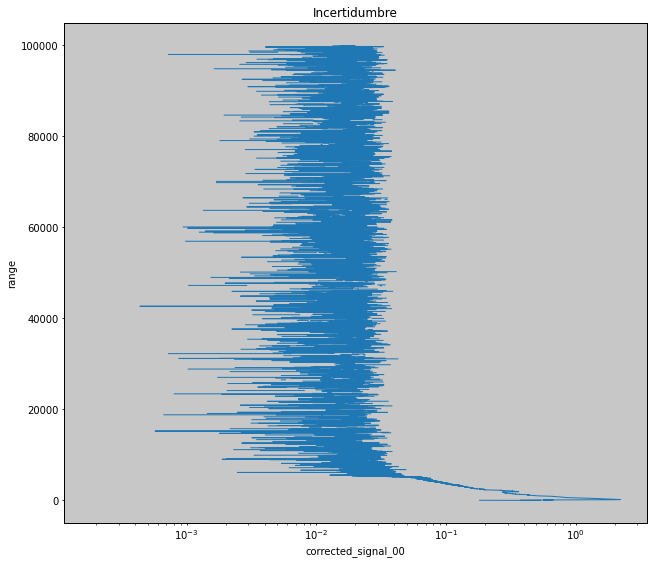

In [ ]:
deltV = np.sqrt(np.power(NSF_15,2) * ds[signal[0]] + np.power(std_bg,2))


fig, axes = plt.subplots(nrows=1, figsize=(10,10))

deltV.sel(time='2021-07-09T06:48:16.000000000').plot(y='range')
plt.xscale('log')
plt.title('Incertidumbre')